# Future Recommendation for chatbot:
## Improving performance through sentiment analysis

In [ ]:
#Load Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### This dataset includes a column of different words users may use and the remaining columns describe the emotion/sentiment associated to that word
### However, this may 

In [31]:
#Load Dataset
dataset = pd.read_csv('./Andbrain_Dataset.csv')
dataset.head(50)

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346
5,acceptance,0.002747,0.008242,0.002747,0.013736,0.024725,0.090659,0.013736
6,accounting,0.017857,0.017857,0.017857,0.017857,0.053571,0.089286,0.017857
7,accuracy,0.035714,0.107143,0.035714,0.035714,0.035714,0.035714,0.035714
8,achieve,0.001382,0.004147,0.000461,0.005069,0.006912,0.122120,0.005069
9,acid,0.017857,0.017857,0.017857,0.017857,0.125000,0.017857,0.017857


# Exploratory data analysis to identify main characteristics within the data.

In [9]:
#Overview of Dataset Characteristics to determine number of non-null count and datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   word      1104 non-null   object 
 1   disgust   1104 non-null   float64
 2   surprise  1104 non-null   float64
 3   neutral   1104 non-null   float64
 4   anger     1104 non-null   float64
 5   sad       1104 non-null   float64
 6   happy     1104 non-null   float64
 7   fear      1104 non-null   float64
dtypes: float64(7), object(1)
memory usage: 69.1+ KB


In [10]:
#Summary of N/A Values
dataset.isnull().sum()

word        0
disgust     0
surprise    0
neutral     0
anger       0
sad         0
happy       0
fear        0
dtype: int64

# Statistical analysis to identify data patterns and correlations.

In [18]:
dataset.corr()

,disgust,surprise,neutral,anger,sad,happy,fear
disgust,1.000000,0.149072,0.557045,0.142729,0.150864,0.049825,0.148948
surprise,0.149072,1.000000,0.396969,-0.017968,0.104156,-0.065244,0.043478
neutral,0.557045,0.396969,1.000000,0.259740,0.370187,0.181255,0.312440
anger,0.142729,-0.017968,0.259740,1.000000,0.038070,-0.118633,-0.058962
sad,0.150864,0.104156,0.370187,0.038070,1.000000,-0.085120,0.070484
happy,0.049825,-0.065244,0.181255,-0.118633,-0.085120,1.000000,-0.106338
fear,0.148948,0.043478,0.312440,-0.058962,0.070484,-0.106338,1.000000


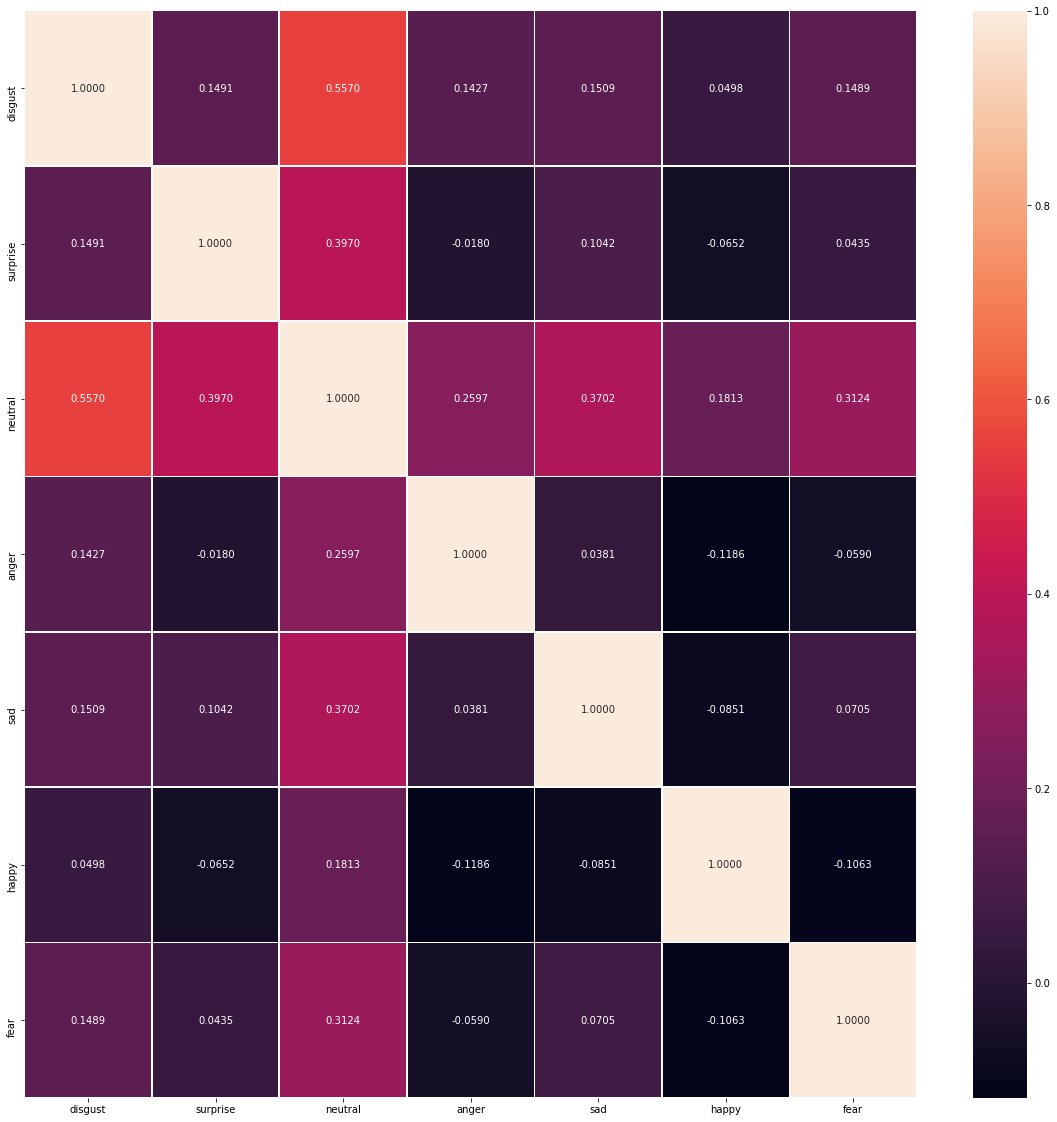

In [20]:
#correlation map 
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset.corr(),annot = True, linewidths = 0.6, fmt = ".4f", ax=ax)
plt.show()

In [21]:
dataset.head(15)

,word,disgust,surprise,neutral,anger,sad,happy,fear
0,ability,0.004464,0.047832,0.000638,0.023597,0.013393,0.015944,0.040179
1,able,0.000017,0.000182,0.000409,0.000176,0.000219,0.000244,0.000186
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
4,accept,0.008271,0.006767,0.000752,0.048872,0.018797,0.024812,0.038346
5,acceptance,0.002747,0.008242,0.002747,0.013736,0.024725,0.090659,0.013736
6,accounting,0.017857,0.017857,0.017857,0.017857,0.053571,0.089286,0.017857
7,accuracy,0.035714,0.107143,0.035714,0.035714,0.035714,0.035714,0.035714
8,achieve,0.001382,0.004147,0.000461,0.005069,0.006912,0.122120,0.005069
9,acid,0.017857,0.017857,0.017857,0.017857,0.125000,0.017857,0.017857


###  Feature engineering for optimal model output
The following columns are used to determine emotions related to a word.
More analysis is done to understand the occurence of different emotions

In [22]:
#Columns in the dataset
dataset.columns

Index(['word', 'disgust', 'surprise', 'neutral', 'anger', 'sad', 'happy',
       'fear'],
      dtype='object')

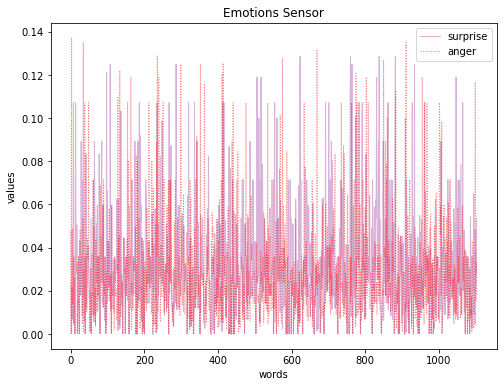

In [23]:
#Data pattern of emotional words related to Surprise and anger
dataset.surprise.plot(kind="line",color="purple",label="surprise",linewidth=1,alpha=0.3,grid=True,linestyle="-")
dataset.anger.plot(color="red",label = "anger", linewidth = 1,alpha=0.5,linestyle=":")
plt.legend(loc="upper right")
plt.xlabel("words")
plt.ylabel("values")
plt.title("Emotions Sensor")
plt.show()

Text(0.5, 1.0, 'Sad-Happy Scatter Plot')

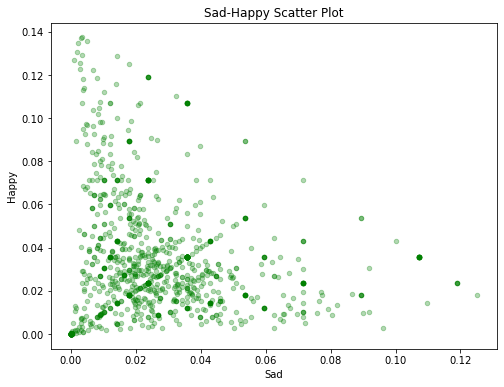

In [24]:
### Scatter Plot showing correlation between intensity of happiness and sadess in words 
dataset.plot(kind="scatter",x="sad",y="happy",alpha=.3,color="green")
plt.xlabel("Sad")
plt.ylabel("Happy")
plt.title("Sad-Happy Scatter Plot")

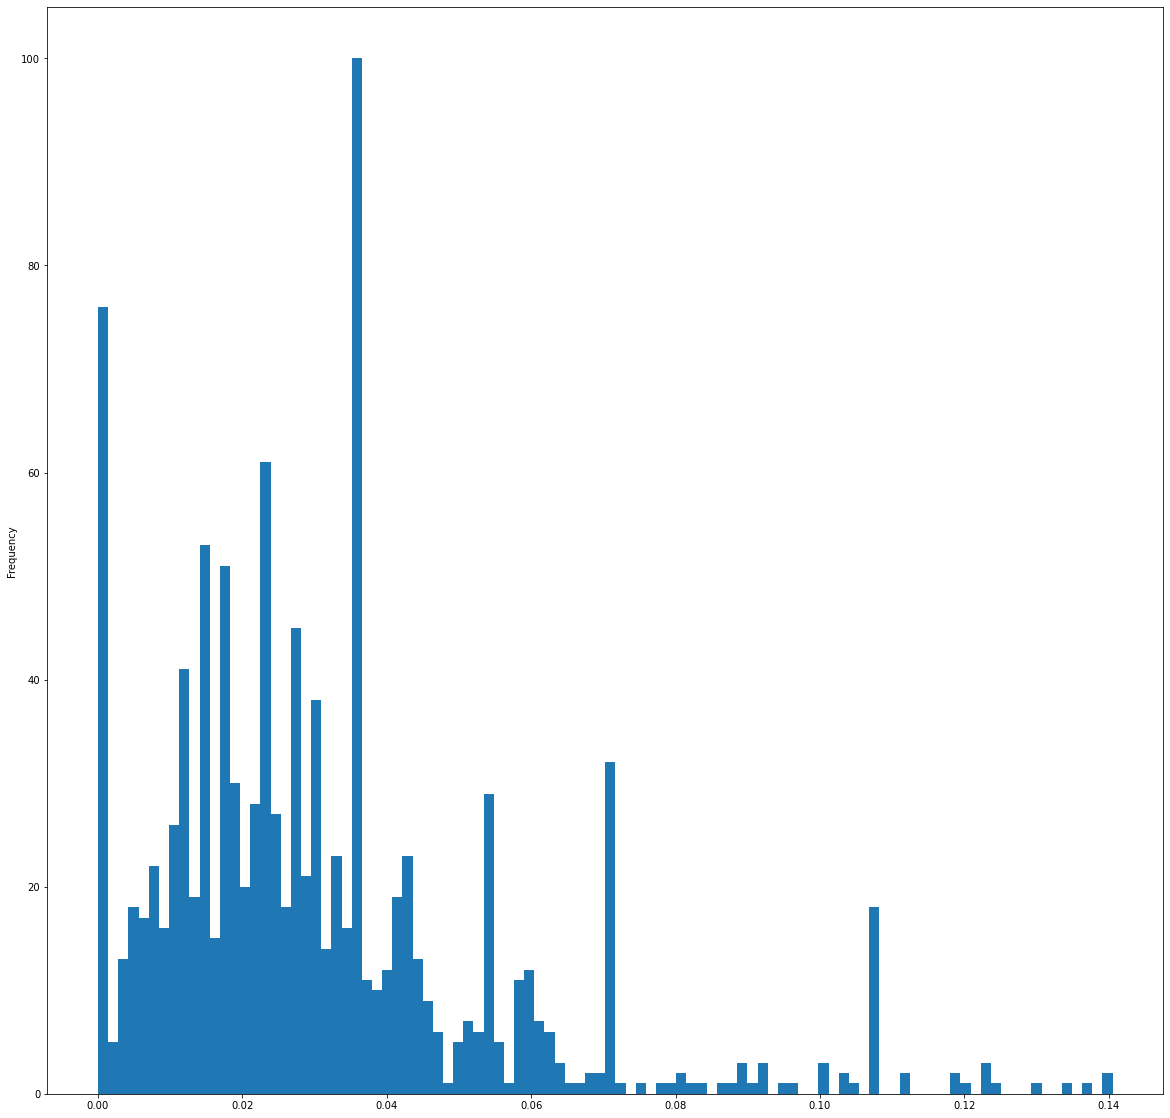

In [25]:
# Histogram showing occurance of fear related emotion in the dataset
dataset.fear.plot(kind="hist",bins=100,figsize=(20,20))
plt.show()

In [39]:
#x showing only the words which have higher happiness value
x= dataset["happy"]>0.09
dataset[x]

,word,disgust,surprise,neutral,anger,sad,happy,fear
3,academy,0.007143,0.021429,0.007143,0.007143,0.007143,0.092857,0.035714
5,acceptance,0.002747,0.008242,0.002747,0.013736,0.024725,0.090659,0.013736
8,achieve,0.001382,0.004147,0.000461,0.005069,0.006912,0.122120,0.005069
29,alabama,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143,0.035714
52,approval,0.001006,0.003018,0.001006,0.001006,0.005030,0.135815,0.001006
53,approved,0.000644,0.000644,0.000644,0.003218,0.003218,0.137066,0.000644
98,beautiful,0.000992,0.014314,0.000142,0.006094,0.003827,0.112954,0.005244
119,bonus,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143,0.035714
137,bureau,0.023810,0.023810,0.023810,0.023810,0.023810,0.119048,0.023810
160,charges,0.007143,0.021429,0.007143,0.007143,0.021429,0.107143,0.007143


In [49]:
#y showing only the words which have higher happiness value
y= dataset["fear"]>0.09
dataset[y]

,word,disgust,surprise,neutral,anger,sad,happy,fear
14,administrator,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143
21,advertisement,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143
31,alert,0.001701,0.008503,0.001701,0.005102,0.001701,0.011905,0.120748
46,ap,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143
67,attack,0.000378,0.003401,0.000378,0.004157,0.010960,0.001890,0.123583
73,automatically,0.003571,0.010714,0.003571,0.017857,0.025000,0.003571,0.096429
74,ave,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143
75,avenue,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.125000
78,babes,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143
216,controls,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143


In [69]:
#Words that have both low fear and higher anger factor
dataset[(dataset["fear"]<.01)&(dataset["anger"]>.08)]

,word,disgust,surprise,neutral,anger,sad,happy,fear
2,abuse,0.000532,0.000177,0.000177,0.137363,0.001241,0.001595,0.002659
133,broken,0.001116,0.002455,0.000223,0.122098,0.007812,0.003348,0.006920
156,chairman,0.008929,0.026786,0.008929,0.080357,0.008929,0.044643,0.008929
235,critical,0.000722,0.002165,0.000722,0.129149,0.003608,0.000722,0.009380
363,fail,0.001283,0.006416,0.000428,0.115911,0.001283,0.010693,0.008982
414,forgot,0.000304,0.005167,0.000304,0.125532,0.003951,0.006383,0.002736
454,goods,0.006494,0.032468,0.006494,0.084416,0.006494,0.032468,0.006494
569,lack,0.004102,0.010042,0.000141,0.101414,0.018246,0.002687,0.006931
575,late,0.000810,0.002431,0.000062,0.127711,0.005173,0.001808,0.005173
669,negative,0.001288,0.001486,0.000099,0.131861,0.003864,0.001090,0.003666


In [30]:
#Data showing anger level of words
threshold = sum(dataset["anger"])/len(dataset["anger"])
dataset["anger_level"] = ["high" if i>threshold else "low" for i in dataset["anger"]]
dataset.loc[:50,["anger_level","anger","word"]]

,anger_level,anger,word
0,low,0.023597,ability
1,low,0.000176,able
2,high,0.137363,abuse
3,low,0.007143,academy
4,high,0.048872,accept
5,low,0.013736,acceptance
6,low,0.017857,accounting
7,high,0.035714,accuracy
8,low,0.005069,achieve
9,low,0.017857,acid
